In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("molecule_ace_gp_results.csv")

In [3]:
df

,Name,Descriptors,R2,RMSE,R2_cliff,RMSE_cliff
0,CHEMBL3979_EC50,morgan,0.596723,0.501816,0.404807,0.590423
1,CHEMBL3979_EC50,morgan_rdkit,0.615922,0.477925,0.440087,0.555426
2,CHEMBL3979_EC50,morgan_counts,0.594368,0.504746,0.421759,0.573607
3,CHEMBL3979_EC50,morgan_counts_rdkit,0.615922,0.477925,0.440087,0.555426
4,CHEMBL262_Ki,morgan,0.608071,0.452148,0.597547,0.427768
...,...,...,...,...,...,...
115,CHEMBL204_Ki,morgan_counts_rdkit,0.807777,0.458820,0.767613,0.580836
116,CHEMBL218_EC50,morgan,0.578159,0.442716,0.457113,0.540271
117,CHEMBL218_EC50,morgan_rdkit,0.589611,0.430698,0.463512,0.533903
118,CHEMBL218_EC50,morgan_counts,0.569224,0.452093,0.440649,0.556656


In [5]:
#df_new = df[["Name","Descriptors","R2_cliff"]].pivot(index="Name",columns="Descriptors")['R2'].reset_index()

Text(0.5, 0, 'Dataset')

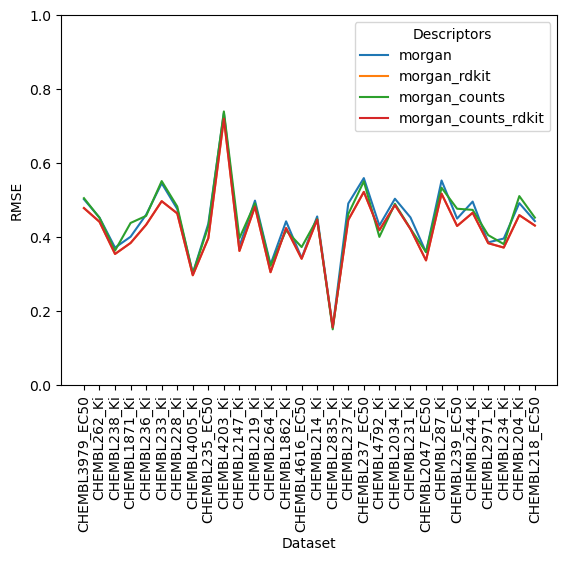

In [8]:
ax = sns.lineplot(x="Name",y="RMSE",data=df,hue="Descriptors")
ax.set_ylim([0,1])
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel("Dataset")

Text(0.5, 1.0, 'Activity Cliff')

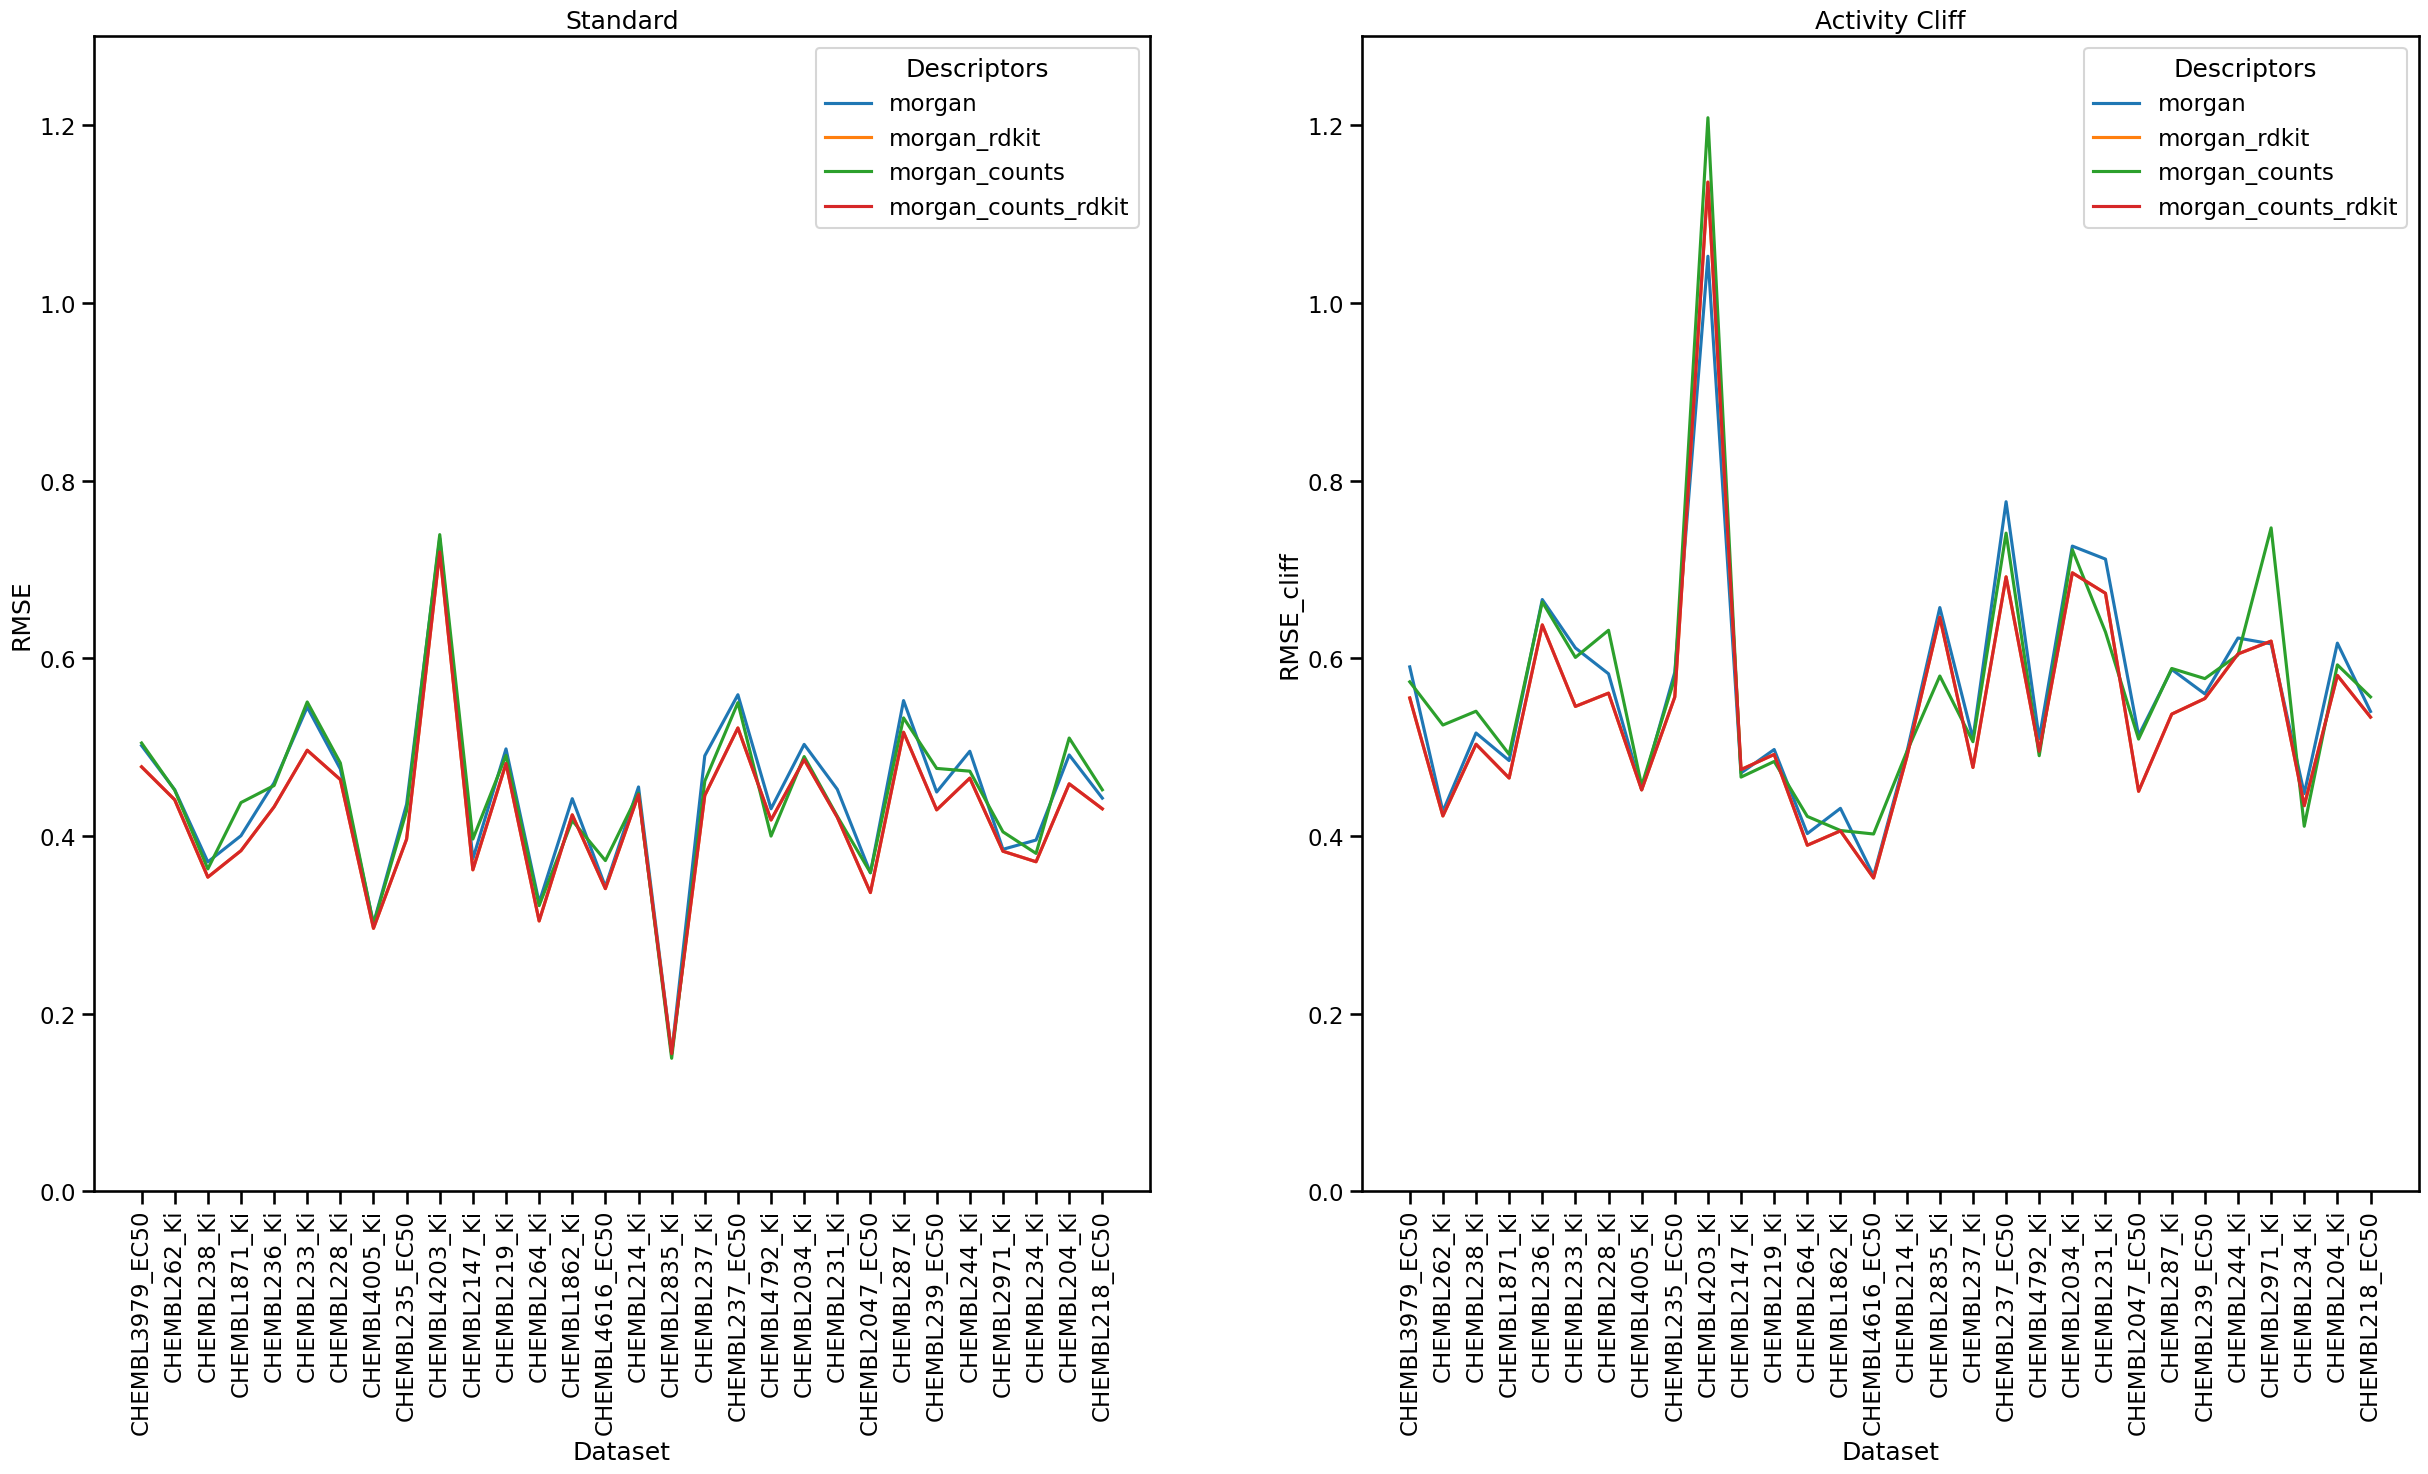

In [12]:
plt.rcParams["figure.figsize"] = (30,15)
figure, axis = plt.subplots(1, 2)
sns.set_context('talk')
ax = sns.lineplot(x="Name",y="RMSE",data=df,hue="Descriptors",ax=axis[0])
ax.set_ylim([0,1.3])
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel("Dataset")
ax.set_title("Standard")
ax = sns.lineplot(x="Name",y="RMSE_cliff",data=df,hue="Descriptors",ax=axis[1])
ax.set_ylim([0,1.3])
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel("Dataset")
ax.set_title("Activity Cliff")

Text(0.5, 1.0, 'Activity Cliff')

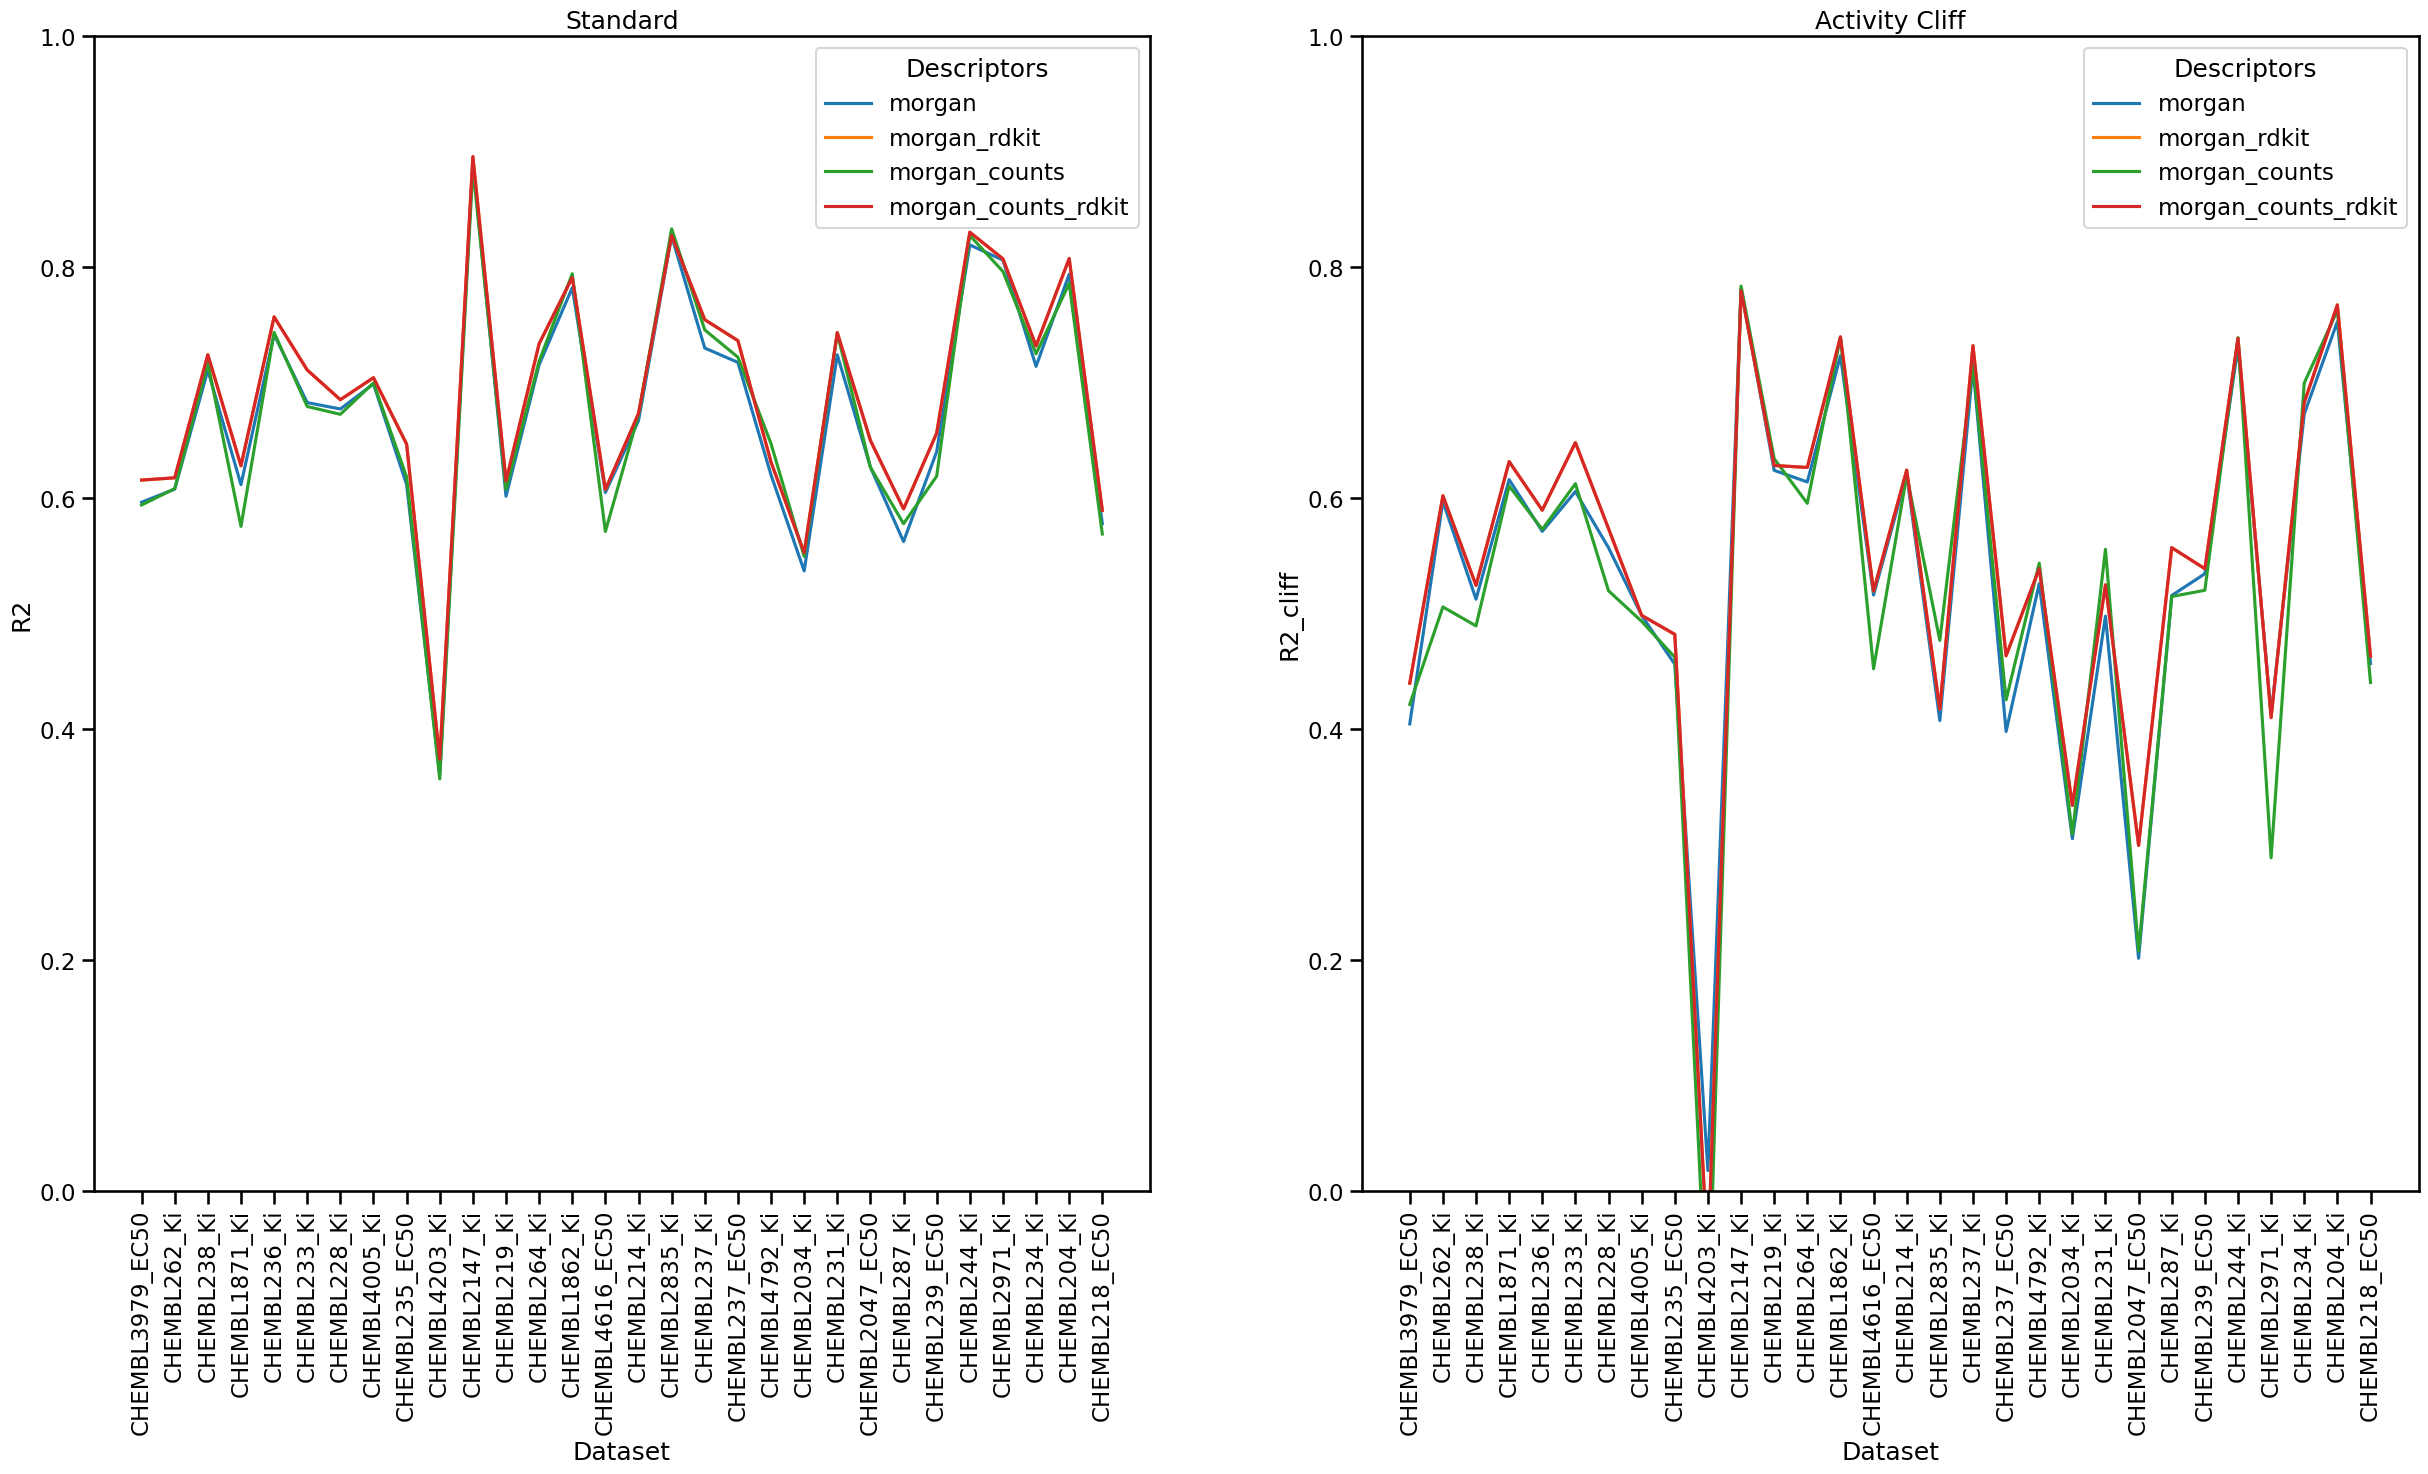

In [13]:
plt.rcParams["figure.figsize"] = (30,15)
figure, axis = plt.subplots(1, 2)
sns.set_context('talk')
ax = sns.lineplot(x="Name",y="R2",data=df,hue="Descriptors",ax=axis[0])
ax.set_ylim([0,1])
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel("Dataset")
ax.set_title("Standard")
ax = sns.lineplot(x="Name",y="R2_cliff",data=df,hue="Descriptors",ax=axis[1])
ax.set_ylim([0,1])
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel("Dataset")
ax.set_title("Activity Cliff")

<AxesSubplot:xlabel='morgan', ylabel='morgan_counts_rdkit'>

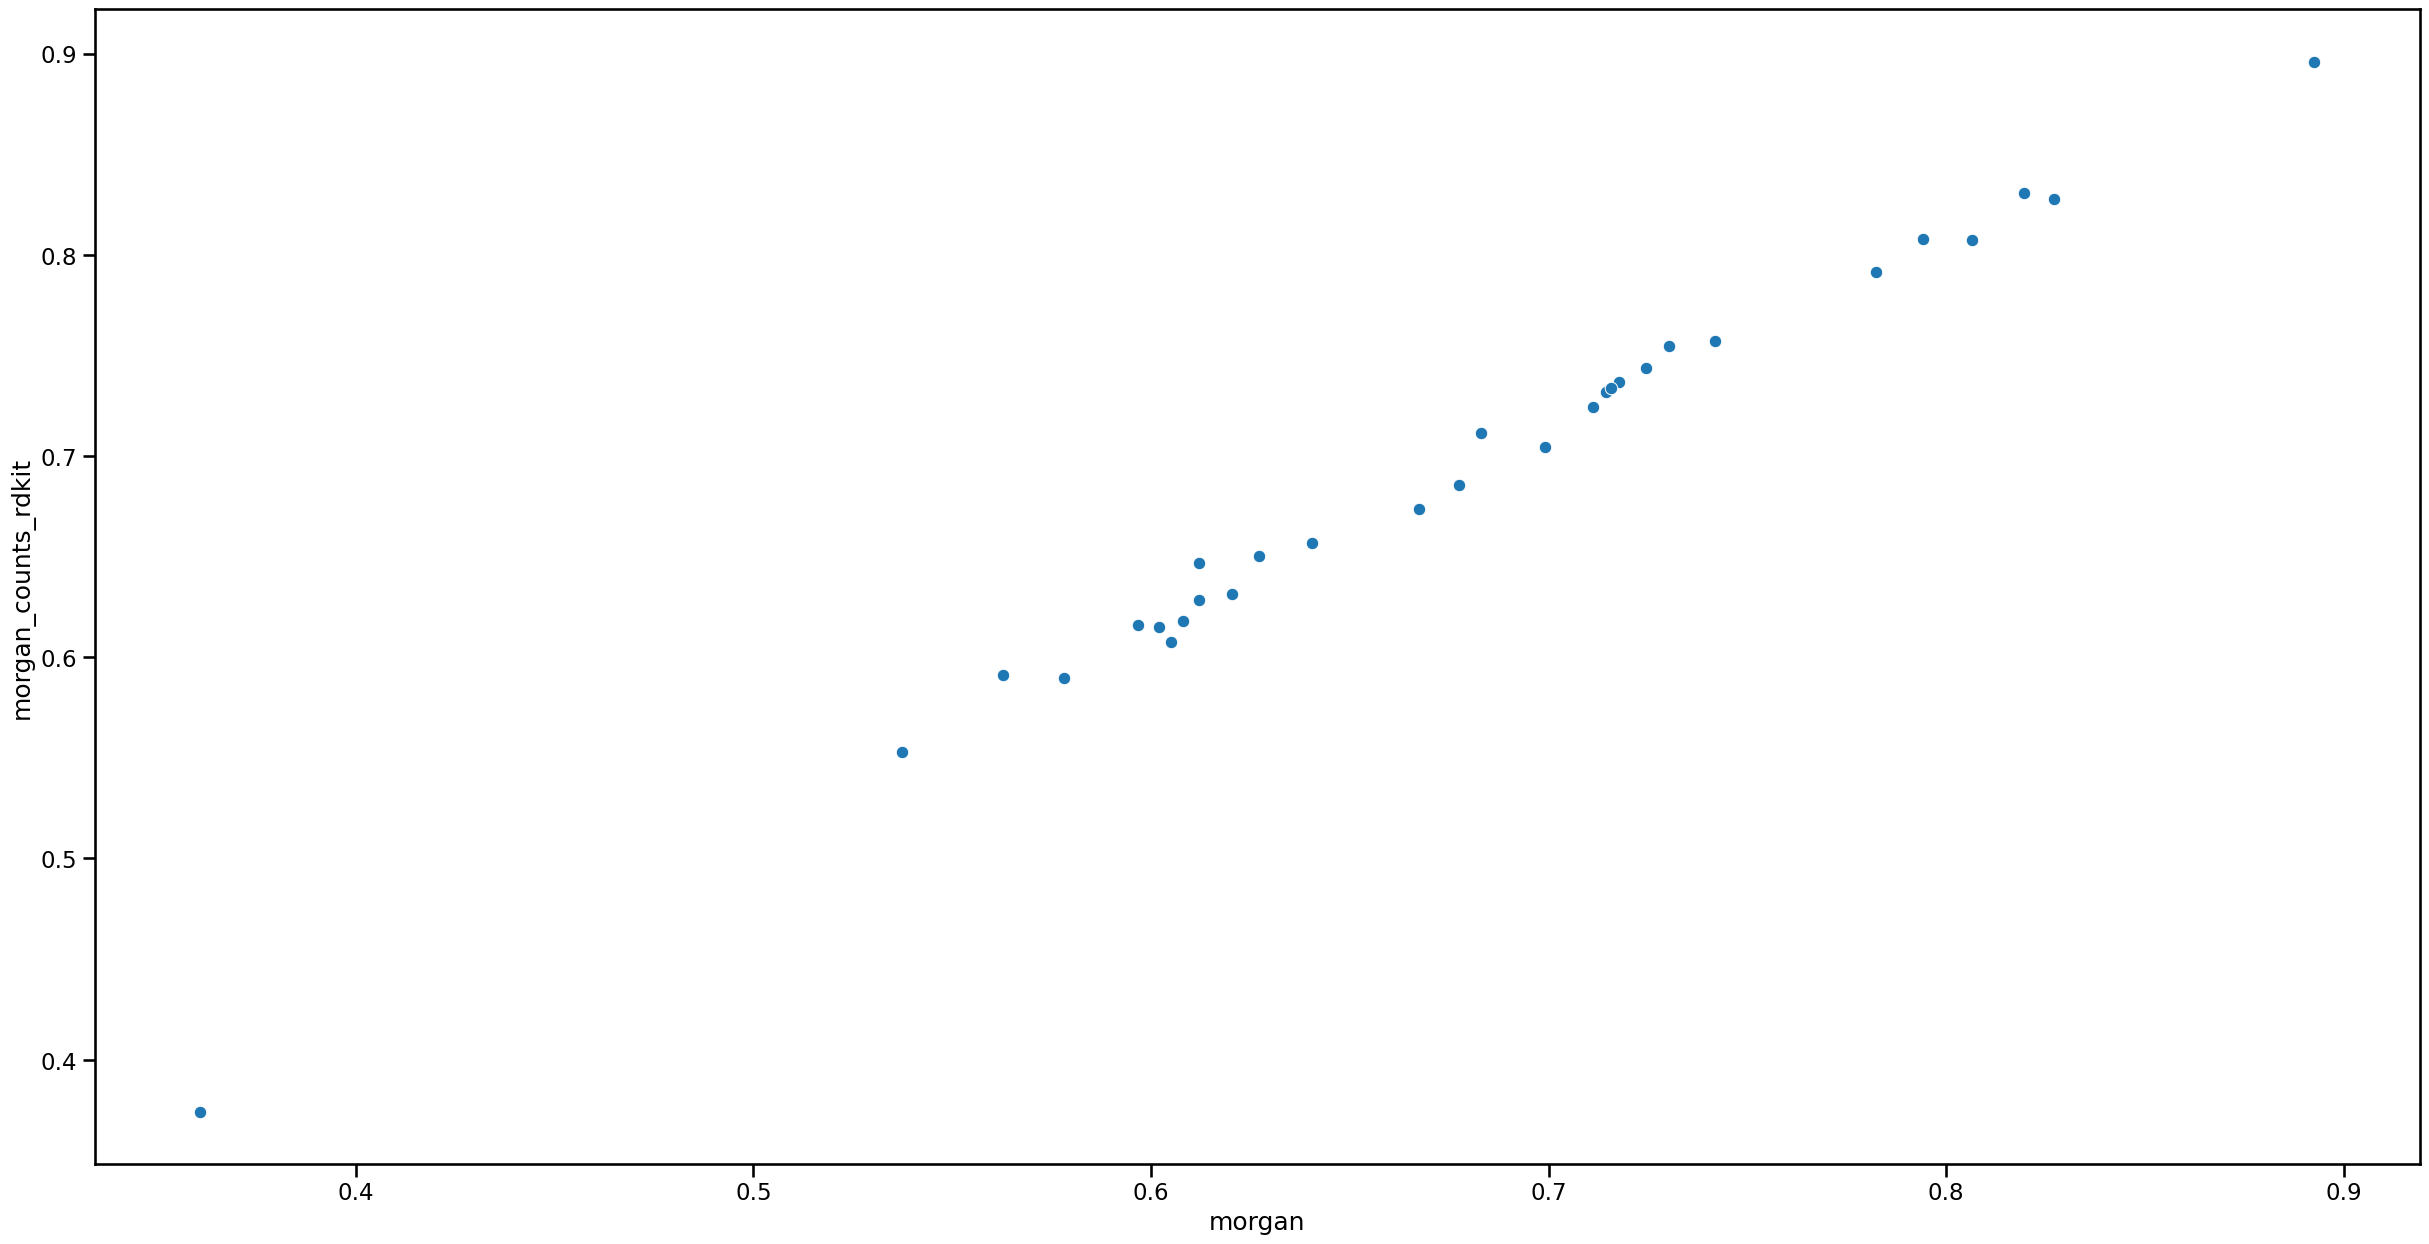

In [78]:
sns.set_context('talk')
sns.scatterplot(x="morgan",y="morgan_counts_rdkit",data=df_new)

In [15]:
ace_df = pd.read_csv("MoleculeACE_results.csv")

In [17]:
ace_df['method'] = ace_df.algorithm+"_"+ace_df.descriptor
ace_df

,dataset,algorithm,descriptor,augmentation,rmse,cliff_rmse,method
0,CHEMBL1862_Ki,AFP,GRAPH,0,0.901053,0.797996,AFP_GRAPH
1,CHEMBL1871_Ki,AFP,GRAPH,0,0.856904,0.836467,AFP_GRAPH
2,CHEMBL2034_Ki,AFP,GRAPH,0,0.893187,0.948683,AFP_GRAPH
3,CHEMBL204_Ki,AFP,GRAPH,0,1.179149,1.325082,AFP_GRAPH
4,CHEMBL2047_EC50,AFP,GRAPH,0,0.840231,0.823298,AFP_GRAPH
...,...,...,...,...,...,...,...
715,CHEMBL3979_EC50,Transformer,TOKENS,10,0.844646,0.857748,Transformer_TOKENS
716,CHEMBL4005_Ki,Transformer,TOKENS,10,0.743998,0.844105,Transformer_TOKENS
717,CHEMBL4203_Ki,Transformer,TOKENS,10,1.011184,1.250538,Transformer_TOKENS
718,CHEMBL4616_EC50,Transformer,TOKENS,10,0.777127,0.790613,Transformer_TOKENS


In [41]:
method_list = [x for x in ace_df.method.unique() if x.find("MACCS") >= 0 or x.find("ECFP") >= 0 ]

In [42]:
method_list

['GBM_ECFP',
 'GBM_MACCS',
 'KNN_ECFP',
 'KNN_MACCS',
 'MLP_ECFP',
 'RF_ECFP',
 'RF_MACCS',
 'SVM_ECFP',
 'SVM_MACCS']

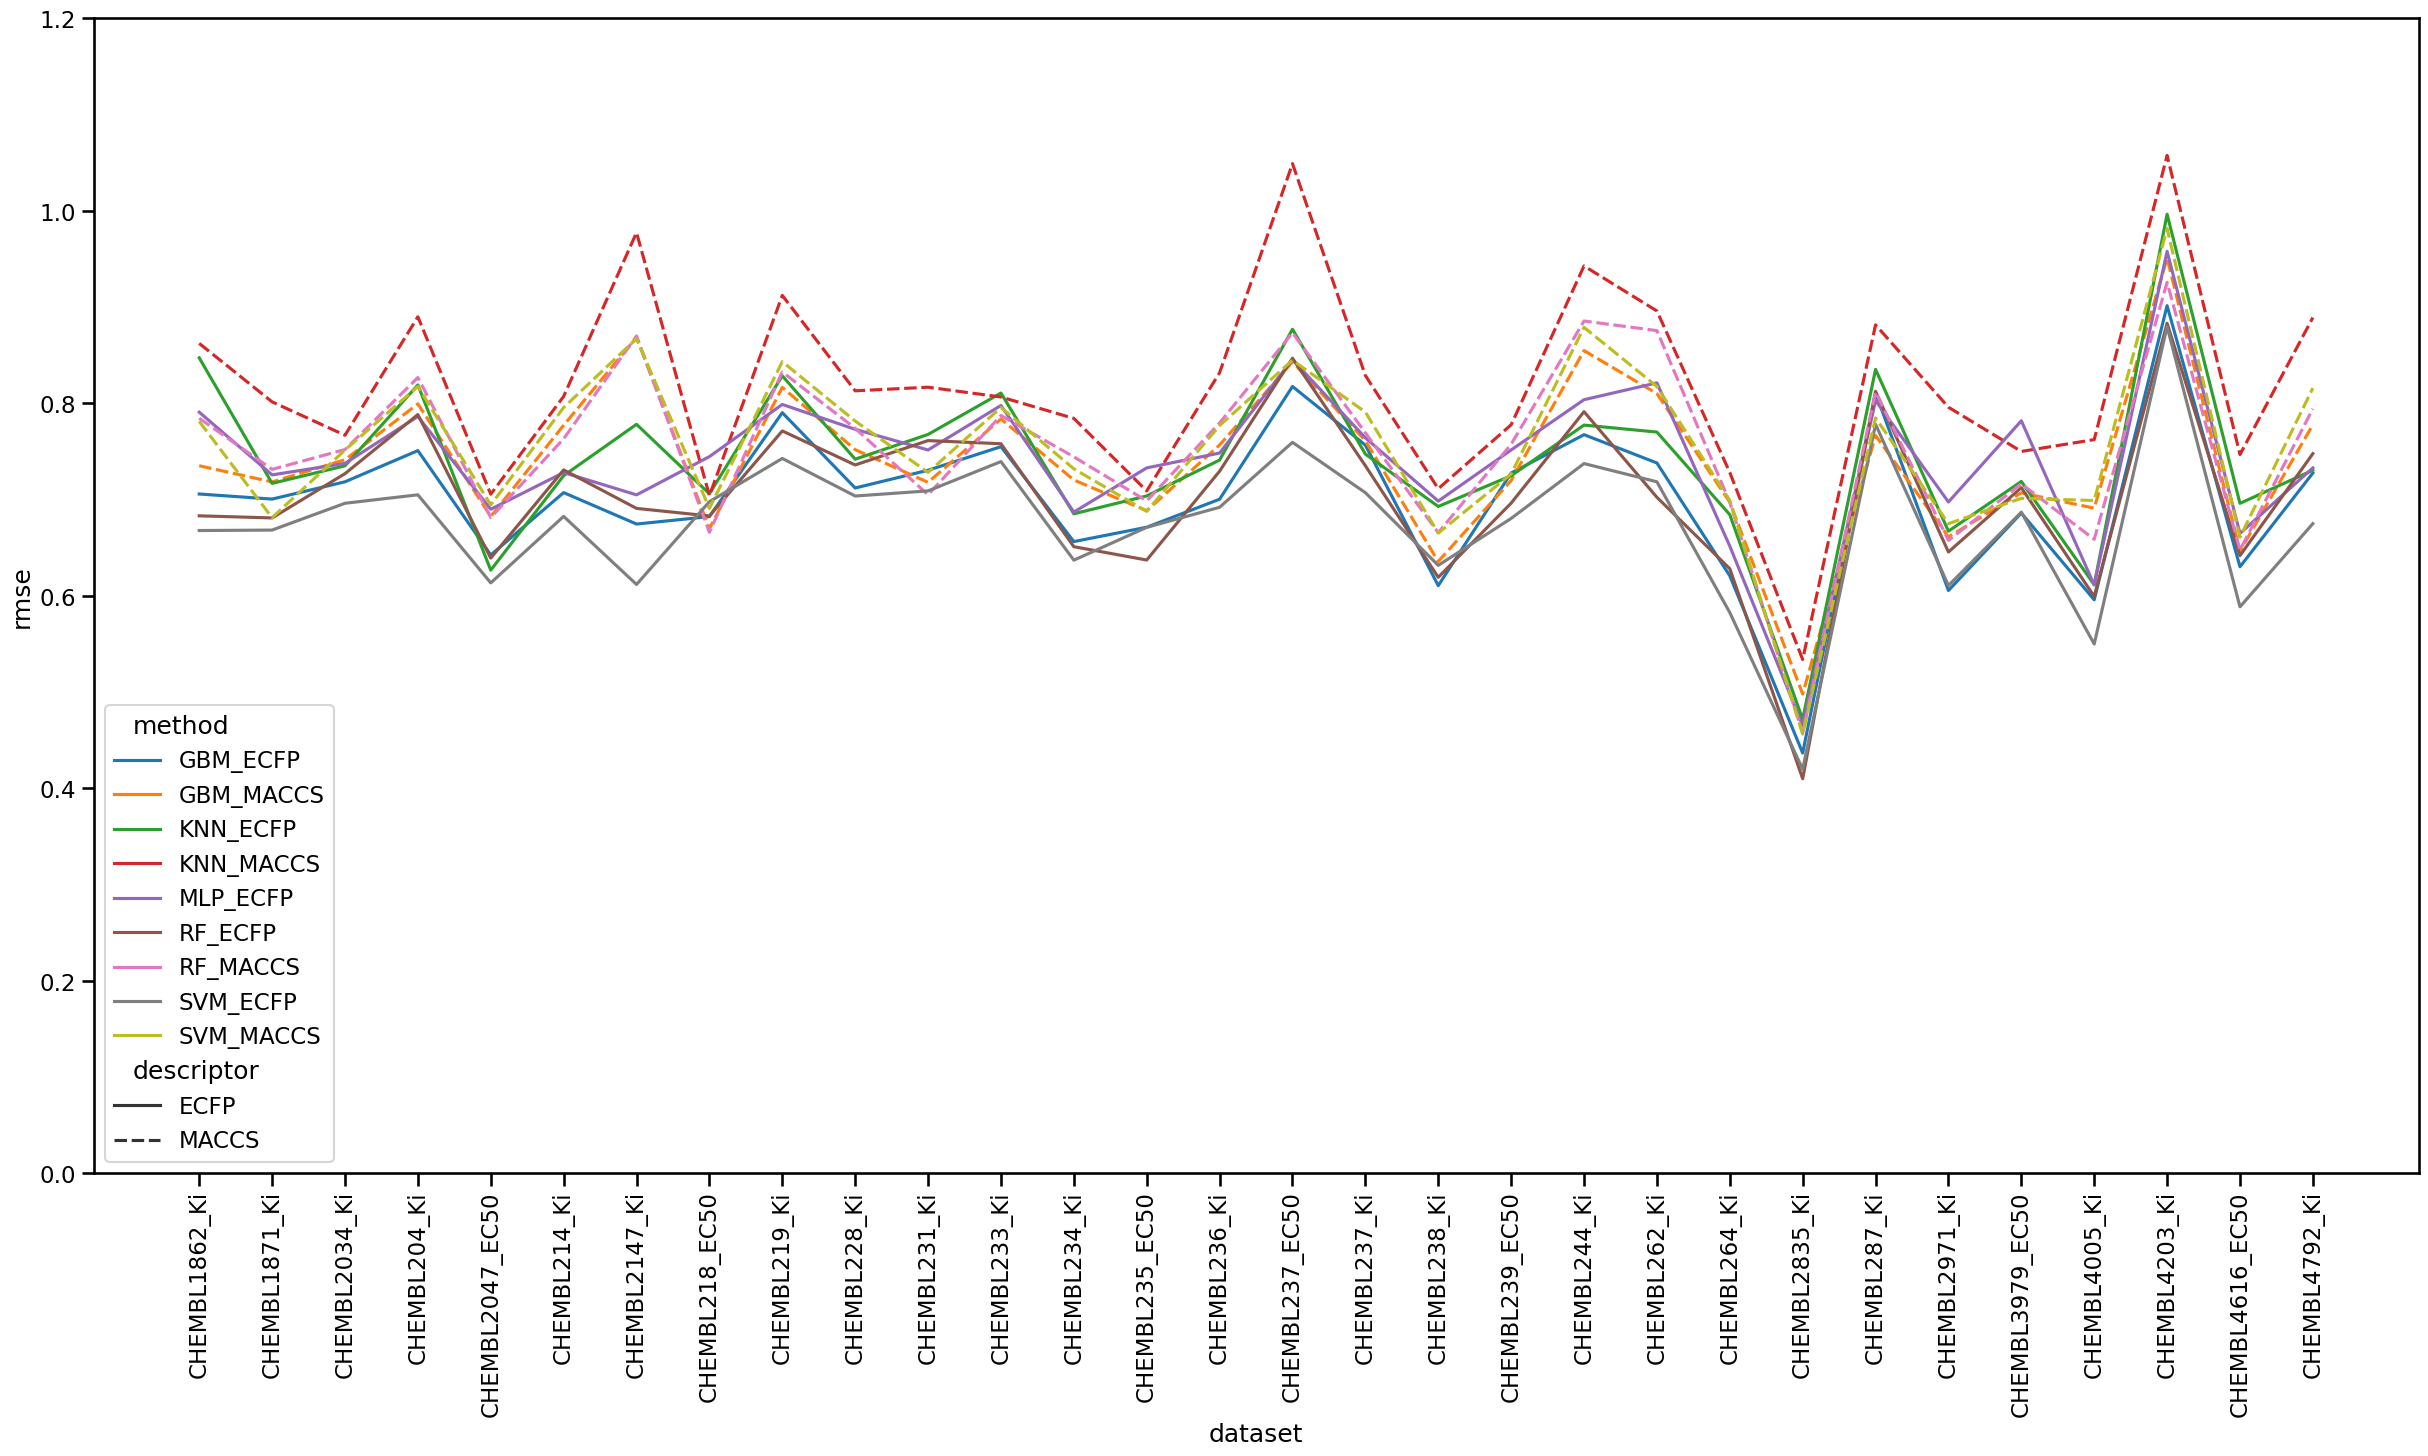

In [45]:
ax = sns.lineplot(x="dataset",y="rmse",hue="method",data=ace_df.query("method in @method_list"),style="descriptor")
ax.set_ylim([0,1.2])
ax.tick_params(axis='x', rotation=90)

In [22]:
df_svm = ace_df[['dataset','rmse','method']].query("method == 'SVM_ECFP'")

In [23]:
df_gp = df.query("Descriptors == 'morgan_counts_rdkit'")[["Name","RMSE"]]

In [24]:
df_gp.columns = ["dataset","rmse"]

In [25]:
df_gp['method'] = "gp_counts_rdkit"

In [26]:
combo_df = pd.concat([df_gp,df_svm])

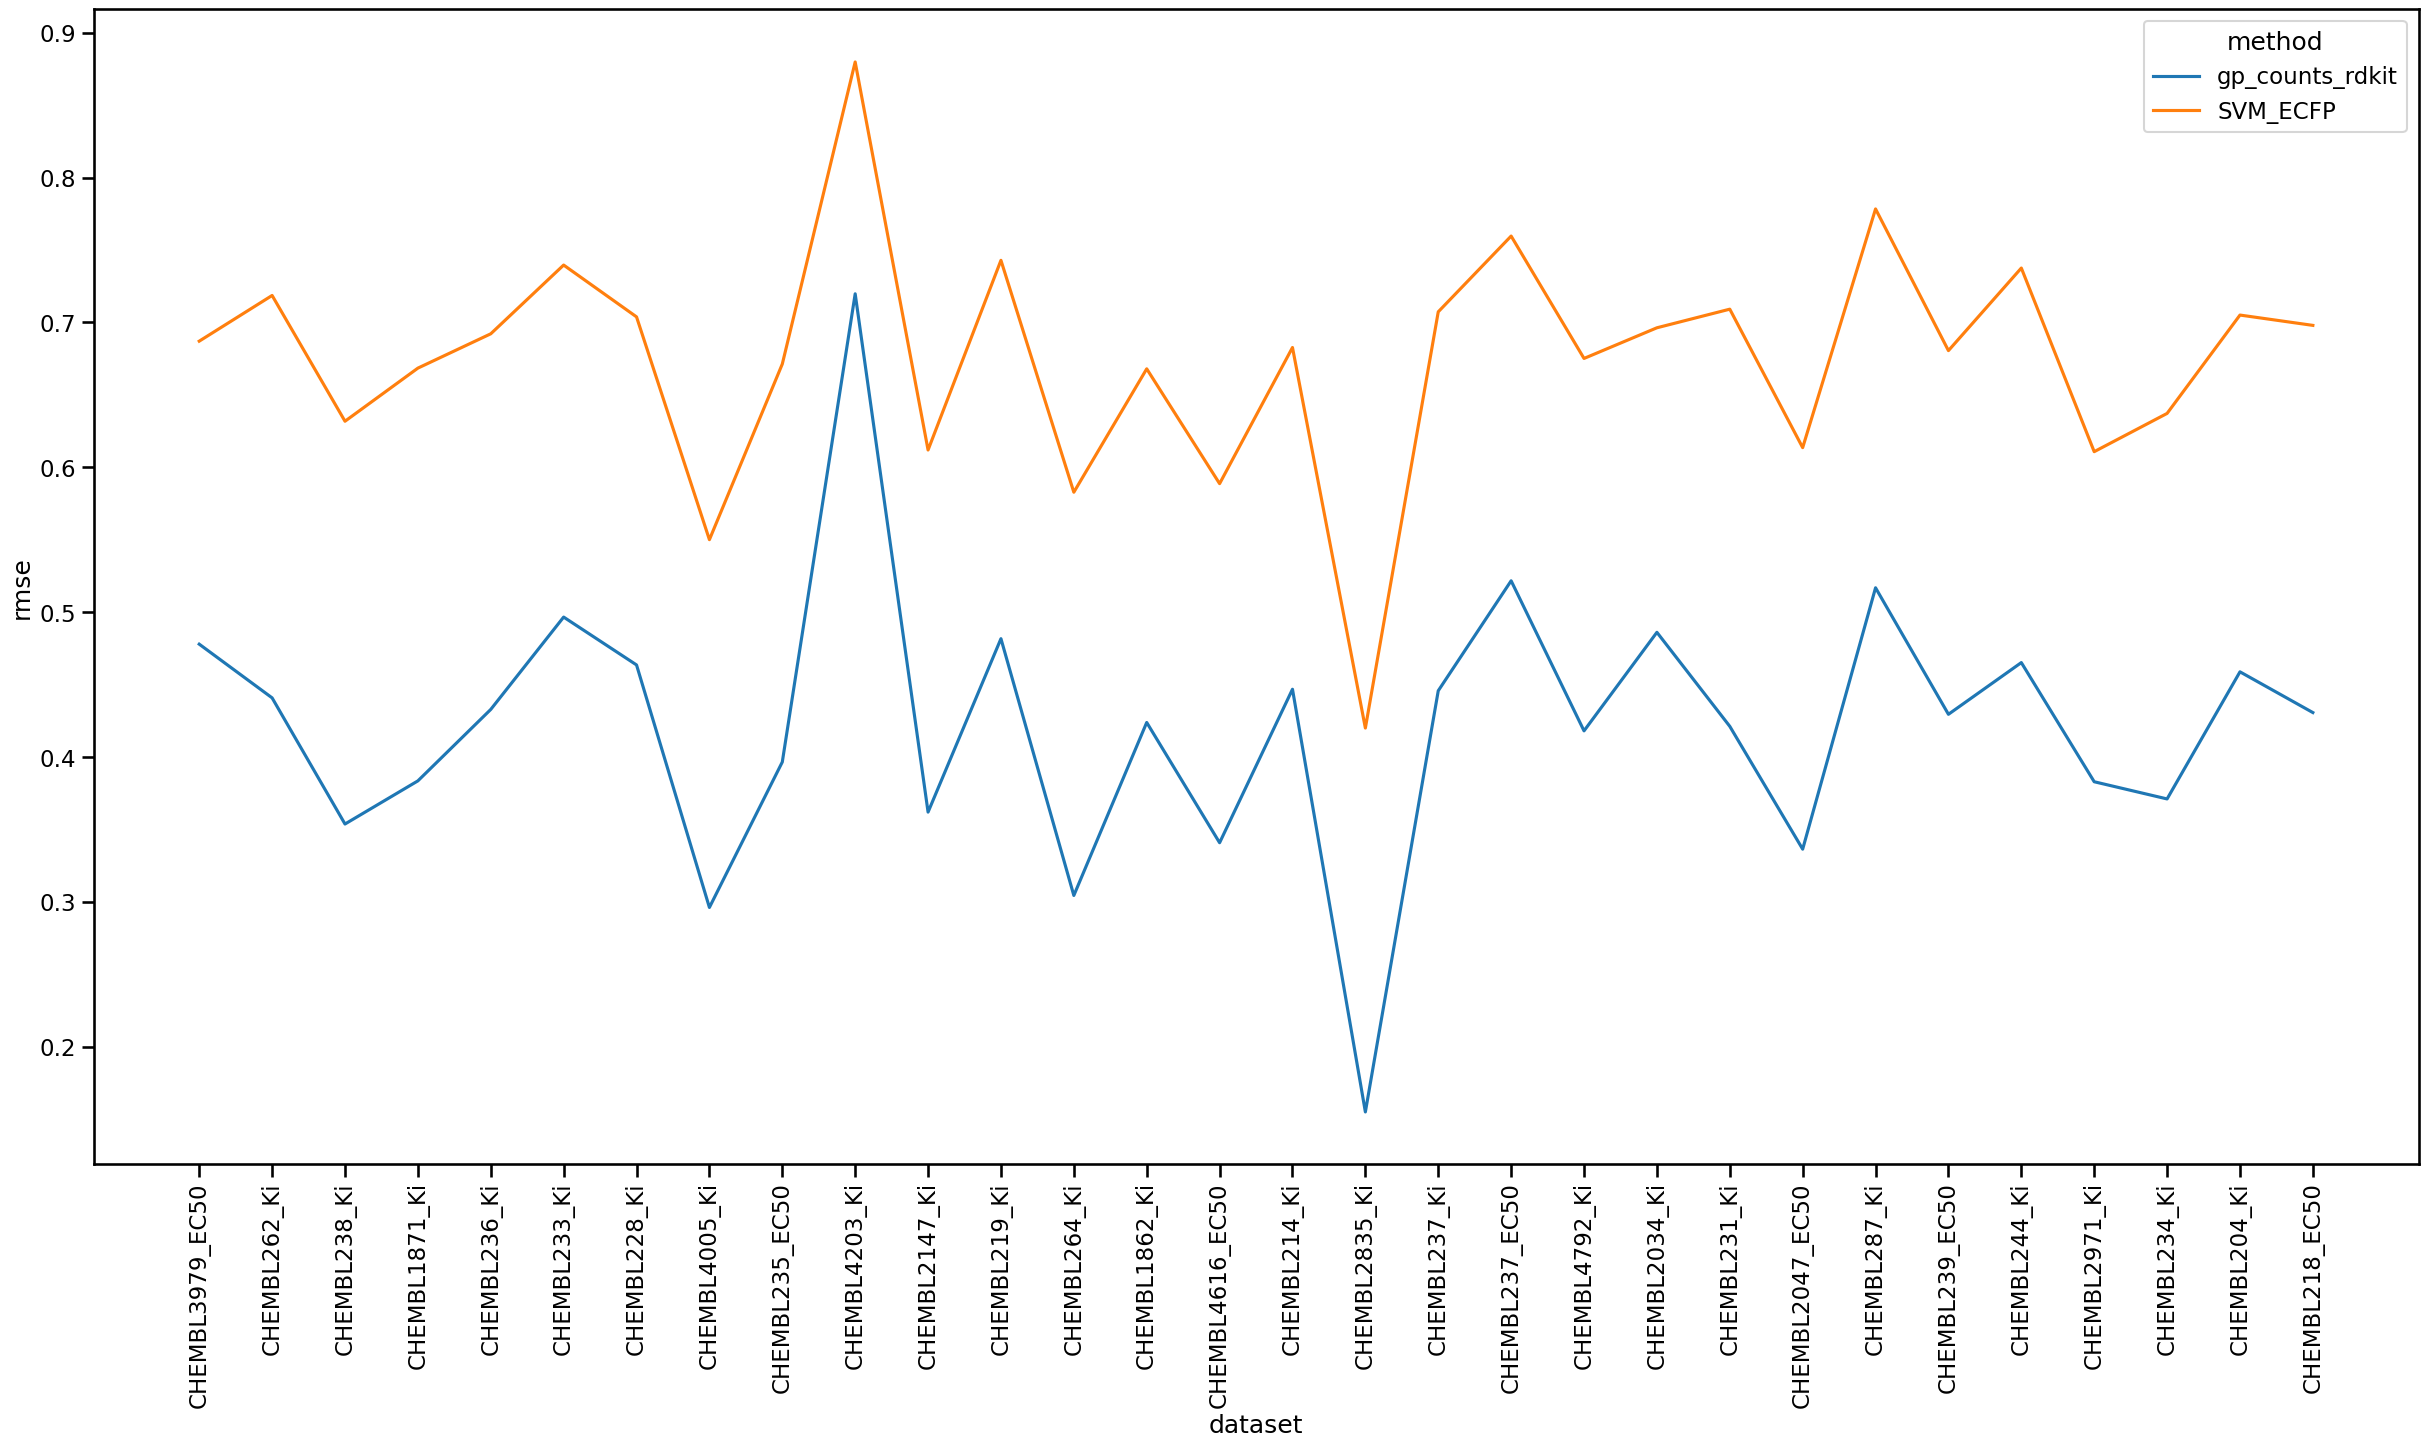

In [27]:
ax = sns.lineplot(x="dataset",y="rmse",hue="method",data=combo_df)
ax.tick_params(axis='x', rotation=90)

In [44]:
ace_df.query("method in @method_list")

,dataset,algorithm,descriptor,augmentation,rmse,cliff_rmse,method
90,CHEMBL1862_Ki,GBM,ECFP,0,0.705929,0.700904,GBM_ECFP
91,CHEMBL1871_Ki,GBM,ECFP,0,0.700651,0.740495,GBM_ECFP
92,CHEMBL2034_Ki,GBM,ECFP,0,0.718612,0.882182,GBM_ECFP
93,CHEMBL204_Ki,GBM,ECFP,0,0.751015,0.854290,GBM_ECFP
94,CHEMBL2047_EC50,GBM,ECFP,0,0.642557,0.680099,GBM_ECFP
...,...,...,...,...,...,...,...
625,CHEMBL3979_EC50,SVM,MACCS,0,0.701468,0.738779,SVM_MACCS
626,CHEMBL4005_Ki,SVM,MACCS,0,0.699163,0.811950,SVM_MACCS
627,CHEMBL4203_Ki,SVM,MACCS,0,0.981741,1.466806,SVM_MACCS
628,CHEMBL4616_EC50,SVM,MACCS,0,0.661021,0.656428,SVM_MACCS
